# ANOVA and Chi Square 

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## One-way ANOVA

### Example 1

Consider the monthly income of members from three different gyms - fitness centers given below:
* Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]
* Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]
* Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]  
Using ANOVA, test whether the mean monthly income is equal for each Gym.


In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

Count, Mean and standard deviation of monthly income of members of Gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:  23, 60.83 and 8.00


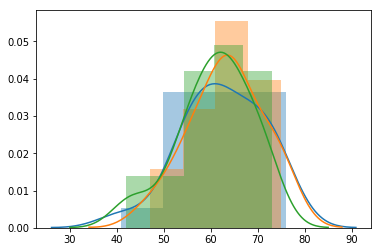

In [45]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

print('Count, Mean and standard deviation of monthly income of members of Gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

sns.distplot(Gym_1)
sns.distplot(Gym_2)
sns.distplot(Gym_3)

In [5]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3) 

In [6]:
monthly_inc_df

,Gym,Monthly_inc
0,1,60
1,1,66
2,1,65
3,1,55
4,1,62
5,1,70
6,1,51
7,1,72
8,1,58
9,1,61


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


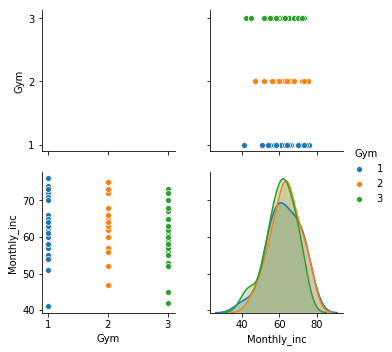

In [7]:
sns.pairplot(monthly_inc_df,diag_kind='kde',hue='Gym')

### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

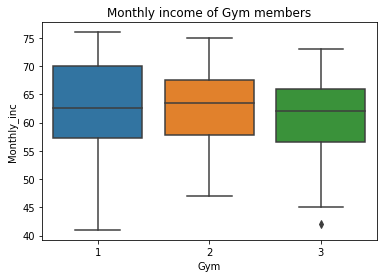

In [8]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

#### The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate F, a test statistic

* scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
* scipy.stats.f.cdf gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom. 

In [9]:
import scipy.stats             as     stats

In [10]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence 3.15


### or Calculate p value

In [11]:
p_value = 1 -stats.f.cdf(0.497075, dfn = 2, dfd = 60)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 60 df with .95 confidence for the calculated F value 0.61079


### Or formulate an ANOVA table using statsmodels

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In the formula. we know that 
* 1)  ~ separates the left hand side of the model from the right hand side
* 2) + adds new columns to the design matrix
* 3) :  adds a new column to the design matrix with the product of the other two columns
* 4) * also adds the individual columns multiplied together along with their product
* 5) C() operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.

In [51]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data = monthly_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, calculated value of F ( = 0.497075) is less than Critical value of F( = 3.15)

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean monthly income of a gym is different from others .

### Example 2

#### National Transportation Safety Board  (NTSB) examines the safety of compact cars, midsize cars and full-size cars. 

Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of  car at 5% level of significance.

* mean_pressure_ compact_car    =  [643, 655,702]
* mean_pressure_ midsize_car    =  [469, 427, 525]
* mean_pressure_ fullsize_car   =  [484, 456, 402]

In [52]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [53]:
mean_pressure_compact_car    =  np.array([643, 655,702])
mean_pressure_midsize_car    =  np.array([469, 427, 525])
mean_pressure_fullsize_car   =  np.array([484, 456, 402])
print('Count, Mean and standard deviation of mean pressue exerted by compact car: %3d, %3.2f and %3.2f' % (len(mean_pressure_compact_car ), mean_pressure_compact_car .mean(),np.std(mean_pressure_compact_car ,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by midsize car: %3d, %3.2f and %3.2f' % (len(mean_pressure_midsize_car), mean_pressure_midsize_car.mean(),np.std(mean_pressure_midsize_car,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by full size car: %3d, %3.2f and %3.2f' % (len(mean_pressure_fullsize_car), mean_pressure_fullsize_car.mean(),np.std(mean_pressure_fullsize_car,ddof =1)))

Count, Mean and standard deviation of mean pressue exerted by compact car:   3, 666.67 and 31.18
Count, Mean and standard deviation of mean pressue exerted by midsize car:   3, 473.67 and 49.17
Count, Mean and standard deviation of mean pressue exerted by full size car:   3, 447.33 and 41.68


In [54]:
mean_pressure_df = pd.DataFrame()

df1            = pd.DataFrame({'Car_Type': 'C', 'Mean_Pressure':mean_pressure_compact_car})
df2            = pd.DataFrame({'Car_Type': 'M', 'Mean_Pressure':mean_pressure_midsize_car})
df3            = pd.DataFrame({'Car_Type': 'F', 'Mean_Pressure':mean_pressure_fullsize_car})

mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2) 
mean_pressure_df = mean_pressure_df.append(df3) 

In [55]:
mean_pressure_df

,Car_Type,Mean_Pressure
0,C,643
1,C,655
2,C,702
0,M,469
1,M,427
2,M,525
0,F,484
1,F,456
2,F,402


### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

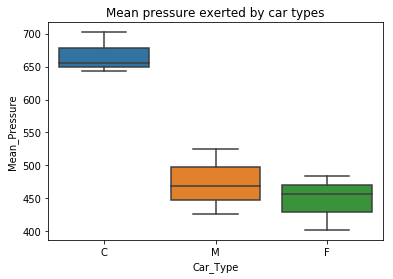

In [56]:
sns.boxplot(x = "Car_Type", y = "Mean_Pressure", data = mean_pressure_df)
plt.title('Mean pressure exerted by car types')
plt.show()

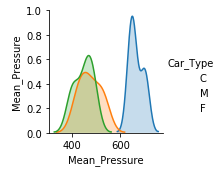

In [57]:
sns.pairplot(mean_pressure_df,diag_kind='kde',hue='Car_Type')

In [58]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_Pressure ~ Car_Type', data = mean_pressure_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq   df          F    PR(>F)
Car_Type  86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN


In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df["Mean_Pressure"], 
                        mean_pressure_df["Car_Type"]))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  C      F    -219.3333 -322.7791 -115.8876  True 
  C      M      -193.0  -296.4458  -89.5542  True 
  F      M     26.3333   -77.1124  129.7791 False 
--------------------------------------------------


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.001207 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean pressure of car is different from others .

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [60]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

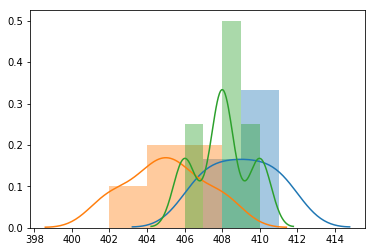

In [61]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])
sns.distplot(life_type_A)
sns.distplot(life_type_B)
sns.distplot(life_type_C)

In [62]:
life_type_df = pd.DataFrame()

df1            = pd.DataFrame({'Type': 'A', 'Life_hours':life_type_A})
df2            = pd.DataFrame({'Type': 'B', 'Life_hours':life_type_B})
df3            = pd.DataFrame({'Type': 'C', 'Life_hours':life_type_C})

life_type_df = life_type_df.append(df1) 
life_type_df = life_type_df.append(df2) 
life_type_df = life_type_df.append(df3) 
life_type_df.head()

,Type,Life_hours
0,A,407
1,A,411
2,A,409
0,B,404
1,B,406


### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

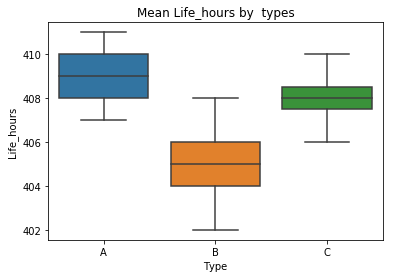

In [63]:
sns.boxplot(x = "Type", y = "Life_hours", data = life_type_df)
plt.title('Mean Life_hours by  types')
plt.show()

### a)  Write your inferene on the group means from the above boxplots.

In [64]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(life_type_df['Life_hours'],life_type_df['Type']
                            )

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd(alpha=0.05).summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B      -4.0   -8.0746 0.0746 False 
  A      C      -1.0   -5.2613 3.2613 False 
  B      C      3.0    -0.7427 6.7427 False 
--------------------------------------------


### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [65]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Life_hours ~ Type', data = life_type_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

          sum_sq   df    F    PR(>F)
Type        36.0  2.0  4.5  0.044194
Residual    36.0  9.0  NaN       NaN


## Two-way ANOVA

### Example 3

The following table shows the quantity of soaps at different discount at locations collected over 20 days.

In [66]:
table1  = [['Loc','Dis0','Dis10','Dis20'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]
headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

    Loc  Dis0  Dis10  Dis20
0     1    20     28     32
1     2    20     19     20
2     1    16     23     29
3     2    21     27     31
4     1    24     25     28
5     2    23     23     35
6     1    20     31     27
7     2    19     30     25
8     1    19     25     30
9     2    25     25     31
10    1    10     24     26
11    2    22     21     31
12    1    24     28     37
13    2    25     33     31
14    1    16     23     33
15    2    21     26     23
16    1    25     26     27
17    2    26     22     22
18    1    16     25     31
19    2    22     28     32
20    1    18     22     37
21    2    25     24     22
22    1    20     24     28
23    2    23     23     29
24    1    17     26     25
25    2    23     26     25
26    1    26     28     23
27    2    24     16     34
28    1    16     21     26
29    2    20     30     30
30    1    21     27     33
31    2    23     22     25
32    1    24     25     28
33    2    18     16     39
34    1    19     20

This is a two-way ANOVA with replication since the data contains values for multiple locations.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of discounts and location on sales.

In [67]:
d0_val  = df1['Dis0'].values
d10_val = df1['Dis10'].values
d20_val = df1['Dis20'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Discount':'0','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Discount':'10','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Discount':'20','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
5,2,0,23
6,1,0,20
7,2,0,19
8,1,0,19
9,2,0,25


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


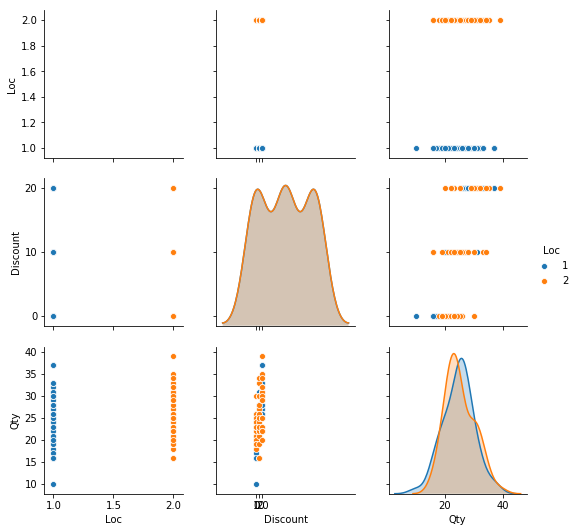

In [68]:
sns.pairplot(Sale_qty_df,diag_kind='kde',hue='Loc')

### Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Discount) are equal. 
* 2) The population means of the second factor (Location) are equal. 
* 3) There is no interaction between the two factors - Discount and Location.

Alternative Hypothesis:

* 1) The population means of the first factor (Discount) are not equal. 
* 2) The population means of the second factor (Location) are not equal. 
* 3) There is an interaction between the two factors - Discount and Location.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

##### Here we have three groups and two factors. There are two independent variables, Discount and Location. 

##### Two-way ANOVA determines how a response (Sale Quantity) is affected by two factors, Discount and Location. 

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [69]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Qty ~ C(Discount) + C(Loc)'
model = ols(formula, Sale_qty_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                  sum_sq     df          F        PR(>F)
C(Discount)  1240.316667    2.0  38.170340  1.829940e-13
C(Loc)          7.008333    1.0   0.431358  5.126241e-01
Residual     1884.666667  116.0        NaN           NaN


In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(Sale_qty_df["Qty"], 
                        Sale_qty_df["Discount"]
                       ))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower   upper  reject
--------------------------------------------
  0      10    3.925   1.7904  6.0596  True 
  0      20    7.875   5.7404 10.0096  True 
  10     20     3.95   1.8154  6.0846  True 
--------------------------------------------


### Step 5:  Decide to reject or accept null hypothesis

In this example, 
* p value for discount  is 1.06e-13 and < 0.05 so we reject the null hypothesis (1) and conclude that the discount rate is having an effect on sales quantity.
* p value for location  is 0.5066 and > 0.05 so we retain the null hypothesis (2) and conclude that the location is not having an effect on sales quantity.
* p value for interaction (discount:location)  is 0.0725 and > 0.05 so we retain the null hypothesis (3) and conclude that the interaction (discount:location) is not having an effect on sales quantity.

### Example 4

The table below shows the percentage of customers satisfied with the quality of service (QoS) offered by A1 Electronics Corporation Limited.

Conduct a two-way ANOVA and draw your inferences about the population means of QoS corresponding to the days as well as the stores.


In [71]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,79, 81, 74, 77, 66],\
           [2, 78, 86, 89, 97, 86], [3, 81, 87, 84, 94, 82], [4, 80, 83, 81, 88, 83], [5, 70, 74, 77, 89, 68]]

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       79       81       74       77       66
1    2       78       86       89       97       86
2    3       81       87       84       94       82
3    4       80       83       81       88       83
4    5       70       74       77       89       68


### Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Day) are equal. 
* 2) The population means of the second factor (Store) are equal. 

Alternative Hypothesis:

* 1) The population means of the first factor (Day) are not equal. 
* 2) The population means of the second factor (Store) are not equal. 

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

##### Here we have five groups and five factors. There are two independent variables, Day and Store. 

##### Two-way ANOVA determines how a response (Quality of Servoce) is affected by two factors, Day and Store. 

##### Here we use 2-way ANOVA without replication since each cell has only one observation.

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [72]:
d0_val  = df1['Day'].values
d1_val  = df1['Store-A'].values
d2_val  = df1['Store-B'].values
d3_val  = df1['Store-C'].values
d4_val  = df1['Store-D'].values
d5_val  = df1['Store-E'].values

In [73]:
df1     = pd.DataFrame({'Day': d0_val, 'Store':'A', 'QoS': d1_val})
df2     = pd.DataFrame({'Day': d0_val, 'Store':'B', 'QoS': d2_val})
df3     = pd.DataFrame({'Day': d0_val, 'Store':'C', 'QoS': d3_val})
df4     = pd.DataFrame({'Day': d0_val, 'Store':'D', 'QoS': d4_val})
df5     = pd.DataFrame({'Day': d0_val, 'Store':'E', 'QoS': d5_val})

QoS_df  = pd.DataFrame()

QoS_df  = QoS_df.append(df1) 
QoS_df  = QoS_df.append(df2) 
QoS_df  = QoS_df.append(df3) 
QoS_df  = QoS_df.append(df4) 
QoS_df  = QoS_df.append(df5) 


pd.DataFrame(QoS_df)

,Day,Store,QoS
0,1,A,79
1,2,A,78
2,3,A,81
3,4,A,80
4,5,A,70
0,1,B,81
1,2,B,86
2,3,B,87
3,4,B,83
4,5,B,74


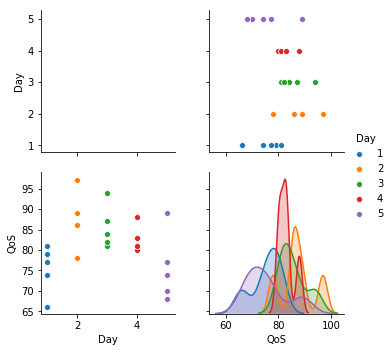

In [74]:
sns.pairplot(QoS_df,diag_kind='kde',hue='Day')

In [75]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'QoS ~ C(Day) + C(Store)'
model = ols(formula, QoS_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

          sum_sq    df         F    PR(>F)
C(Day)    617.36   4.0  8.737051  0.000614
C(Store)  461.76   4.0  6.534956  0.002575
Residual  282.64  16.0       NaN       NaN


In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(QoS_df["QoS"], 
                        QoS_df["Day"]
                       ))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2      11.8    0.2531  23.3469  True 
  1      3      10.2   -1.3469  21.7469 False 
  1      4      7.6    -3.9469  19.1469 False 
  1      5      0.2    -11.3469 11.7469 False 
  2      3      -1.6   -13.1469  9.9469 False 
  2      4      -4.2   -15.7469  7.3469 False 
  2      5     -11.6   -23.1469 -0.0531  True 
  3      4      -2.6   -14.1469  8.9469 False 
  3      5     -10.0   -21.5469  1.5469 False 
  4      5      -7.4   -18.9469  4.1469 False 
----------------------------------------------


### Step 5:  Decide to reject or accept null hypothesis

In this example, 
* p value for Day is 0.000614 and < 0.05 so we reject the null hypothesis (1) and conclude that the Day is having an effect on Quality of Service.
* p value for Stores is 0.002575 and < 0.05 so we retain the null hypothesis (2) and conclude that the Stores is having an effect on Quality of Service.

#### We conclude that stores as well as days reveal different patterns in the level of QoS.

### Practice Exercise 2

## Try example 4 with the following values:

In [77]:
table2  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

## Chi Square

### Properties of Chi Square distribution

##### 1. The mean and standard deviation of a chi-square distribution are k and √2k respectively, where k is the degrees of freedom.
##### 2. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
##### 3. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
##### 4. Chi square test is a right tailed test.

### Chi-square Goodness of fit tests

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution pf data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


### Chi-square Goodness of fit tests

Chi-square statistic for goodness of fit is given by 

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

###  Example 5

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: Meal preference is as per the perceived ratios of the operations manager
                        
Alternative hypothesis: $H_A$: Meal preference is different from the perceived ratios of the operations manager

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Since we have observed frequencies of meal preference and we can calculate the expected frequencies, we can use chi-square goodness of fit for this problem.

### Step 4: Calculate p value or chi-square statistic value

Use the scipy.stats.chisquare function to compute Chi square goodness of fit by giving the observed values and expected values as input.

The first value in the returned tuple is the χ2 value itself, while the second value is the p-value computed using 
ν = k−1 where k is the number of values in each array.

We can calculate the expected frquency as follows:
1. Compute the total number of passengers. It will be 500.
2. We expect 30% of them prefer Vegan food, so the expected frequency for Vegan Food is = 0.3 * 500 = 150
3. Similarly we can calculate the expected frequencies of the rest of them.

In [78]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()

expected_values    = scipy.array([n*0.3, n*.45, n*0.2, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0000449


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.0000449 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that Meal preference is not defined in the null hypothesis.

### Practice Exercise 3

Refer to the above example 5. Here the operations manager changes his belief and now believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

scipy.stats.chi2_contingency is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

### Example 6 

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [79]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 22.15247 P value 0.000015 Degrees of freedom 2


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [80]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])

### Take Home Exercises

** 1)  Is there any evidence that the stock return depends on sector like industrial or consumer or service?
The following table shows the annual return of stocks under different sectors:**

Count, Mean and standard deviation of monthly income of members of Consumer Grp:  30, 0.082653 and 0.001010
Count, Mean and standard deviation of monthly income of members of Service Grp:  30, 0.079823 and 0.003073
Count, Mean and standard deviation of monthly income of members of Industrial Grp:  30, 0.060503 and 0.000963


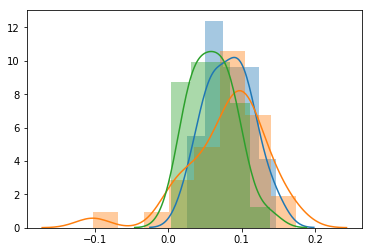

In [81]:
y_stock_consumer = [ 0.0632, 0.1473, 0.1195, 0.1236, 0.1028, 0.0381, 0.1015, 0.1106, 0.0629, 0.0515, 0.0844, 0.1428, 0.0889, 0.0598,\
                    0.0696, 0.1162, 0.0522, 0.0534, 0.0593, 0.0710, 0.1091, 0.0820, 0.1019, 0.0904, 0.0861, 0.0939, 0.0263, \
                    0.0277, 0.0476, 0.0960]

X1                = np.array(y_stock_consumer)
print('Count, Mean and standard deviation of monthly income of members of Consumer Grp: %3d, %3.6f and %3.6f' % (len(X1), X1.mean(),np.var(X1,ddof =1)))

y_stock_service =  [ 0.1370, 0.0358, 0.0136, 0.1741, 0.1001, 0.1088, 0.1563, -0.0004, 0.1032, 0.0740, 0.1148, 0.0971, 0.1119, 0.0821,\
                    0.0164, 0.0145, 0.1012, 0.1385, -0.1027, 0.0526, 0.1205, 0.0447, 0.0871, 0.0559, 0.1002, 0.0765, 0.1003, 0.0787, 0.0659, 0.1360]

X2                = np.array(y_stock_service)
print('Count, Mean and standard deviation of monthly income of members of Service Grp: %3d, %3.6f and %3.6f' % (len(X2), X2.mean(),np.var(X2,ddof =1)))

y_stock_indistrial = [ 0.0674, 0.0711, 0.0569, 0.0248, 0.0542, 0.0800, 0.0255, 0.0834, 0.0499, 0.0339, 0.0873, 0.1385, 0.0529, 0.0906, 0.0284,\
                       0.0582, 0.0766, 0.0412, 0.0910, 0.0876, 0.1077, 0.0148, 0.0471, 0.1066, 0.0044, 0.0294, 0.0655, 0.0284, 0.0390, 0.0728]

X3                = np.array(y_stock_indistrial)
print('Count, Mean and standard deviation of monthly income of members of Industrial Grp: %3d, %3.6f and %3.6f' % (len(X3), X3.mean(),np.var(X3,ddof =1)))


sns.distplot(X1)
sns.distplot(X2)
sns.distplot(X3)


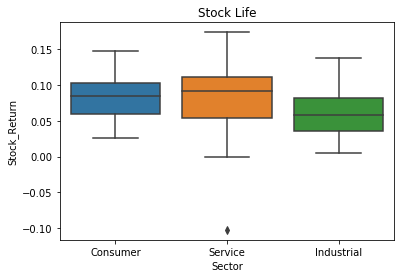

In [82]:
import pandas as pd
import numpy  as np

df1     = pd.DataFrame({'Sector': 'Consumer',   'Stock_Return': y_stock_consumer})
df2     = pd.DataFrame({'Sector': 'Service',    'Stock_Return': y_stock_service})
df3     = pd.DataFrame({'Sector': 'Industrial', 'Stock_Return': y_stock_indistrial})

y_stock_df  = pd.DataFrame()

y_stock_df  = y_stock_df.append(df1) 
y_stock_df  = y_stock_df.append(df2) 
y_stock_df  = y_stock_df.append(df3) 


pd.DataFrame(y_stock_df.head())


sns.boxplot(x = "Sector", y = "Stock_Return", data = y_stock_df)
plt.title('Stock Life')
plt.show()

#### Hint: Try One-way ANOVA

**2 The following table shows the quantity of soaps at different discount of different brands collected over 20 days.**

In [83]:
table1  = [['Loc','Brand X','Brand Y','Brand Z'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1.head())

   Loc  Brand X  Brand Y  Brand Z
0    1       20       28       32
1    2       20       19       20
2    1       16       23       29
3    2       21       27       31
4    1       24       25       28


This is a two-way ANOVA with replication since the data contains values for multiple locations.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of Brands and location on sales.

** 3 Blood group of patients of the hospital is given below:**

| Blood group | Count |
| ------ | --- |
| O | 44%|
| A | 45% |
| B | 8% |
| AB | 3% |


Observed frequency

| Blood group | Count |
| ----- | ----|
| O | 67 |
| A | 83 |
| B | 29 |
| C | 8 |

At 5% level of significance do you have evidence to conclude that there are differences in the distribution of blood groups among patients that is expected as per our prior knowledge.



**4. The shift quality data is given below:**

| Shift | Perfect | Satisfactory | Defective |
| ---- | ----- | ----- | ----- |
| I | 106 | 124 | 1 | 
|II |  67 | 85 | 1 |
| III | 37 | 72 | 3 |

At 5% level of significance do you have evidence to conclude that there are differences in quality among the three shifts?


## E N D  

In [84]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Stock_Return ~ Sector', data = y_stock_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df        F    PR(>F)
Sector    0.008719   2.0  2.59173  0.080664
Residual  0.146340  87.0      NaN       NaN
